In [ ]:
# Importing required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
# Load the dataset
meteorite_data=pd.read_csv("/content/Meteorite_Landings.csv")

# Remove the null values
meteorite_data=meteorite_data.dropna().reset_index(drop=True)

In [ ]:
#Exploring the data
meteorite_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38115 entries, 0 to 38114
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38115 non-null  object 
 1   id           38115 non-null  int64  
 2   nametype     38115 non-null  object 
 3   recclass     38115 non-null  object 
 4   mass (g)     38115 non-null  float64
 5   fall         38115 non-null  object 
 6   year         38115 non-null  float64
 7   reclat       38115 non-null  float64
 8   reclong      38115 non-null  float64
 9   GeoLocation  38115 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.9+ MB


In [ ]:
#Exploring the descriptive statistics of the dataset
meteorite_data.describe()

id      mass (g)          year        reclat       reclong
count  38115.000000  3.811500e+04  38115.000000  38115.000000  38115.000000
mean   25343.139000  1.560071e+04   1989.993913    -39.596529     61.309359
std    17395.360205  6.286817e+05     25.469892     46.175830     80.777583
min        1.000000  0.000000e+00    860.000000    -87.366670   -165.433330
25%    10831.500000  6.630000e+00   1986.000000    -76.716670      0.000000
50%    21732.000000  2.909000e+01   1996.000000    -71.500000     35.666670
75%    39887.500000  1.872900e+02   2002.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2101.000000     81.166670    178.200000

In [ ]:
# Building a model for predicting the probability of a meteorite falling in a given region
# Select relevant features and target variable for predicting the probability
features = ['reclat', 'reclong']
target = 'fall'

# Create feature matrix (X) and target vector (y)
X = meteorite_data[features]
y = meteorite_data[target]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_scaled, y)

# Function to predict the probability of meteorite fall
def predict_meteorite_probability(latitude, longitude):
    input_data = pd.DataFrame({
        'reclat': [latitude],
        'reclong': [longitude]
    })

    # Standardize features using the same scaler used for training
    input_data_scaled = scaler.transform(input_data)

    # Predict the probability of a meteorite falling
    probability = model.predict_proba(input_data_scaled)[:, 1]

    return probability[0]

# Example usage
latitude = float(input("Enter latitude: "))
longitude = float(input("Enter longitude: "))

probability = predict_meteorite_probability(latitude, longitude)
print(f"Probability of a meteorite falling at ({latitude}, {longitude}): {probability:.2%}")


Enter latitude: -66
Enter longitude: -33
Probability of a meteorite falling at (-66.0, -33.0): 99.99%


count    3.811500e+04
mean     1.560071e+04
std      6.286817e+05
min      0.000000e+00
25%      6.630000e+00
50%      2.909000e+01
75%      1.872900e+02
max      6.000000e+07
Name: mass (g), dtype: float64


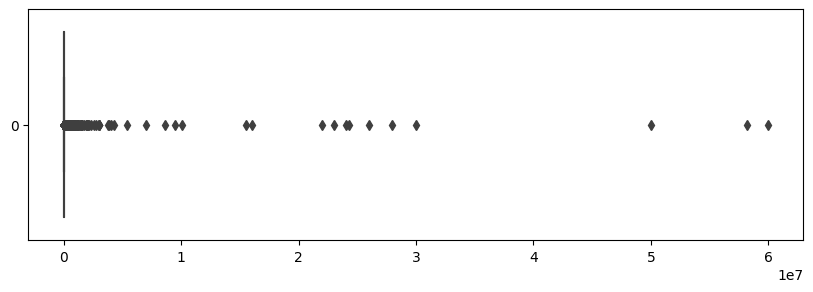

In [ ]:
0# Display descriptive statistics of the 'mass (g)' column in the meteorite_data DataFrame
print(meteorite_data['mass (g)'].describe())
plt.figure(figsize=(10,3))

# Create a horizontal boxplot using seaborn to visualize the distribution of meteorite masses
# 'mass (g)' is the column from the meteorite_data DataFrame
# orient='h' specifies a horizontal orientation for the boxplot
sns.boxplot(meteorite_data['mass (g)'],orient='h')

# Show the plot
plt.show()

count    38115.000000
mean      1989.993913
std         25.469892
min        860.000000
25%       1986.000000
50%       1996.000000
75%       2002.000000
max       2101.000000
Name: year, dtype: float64


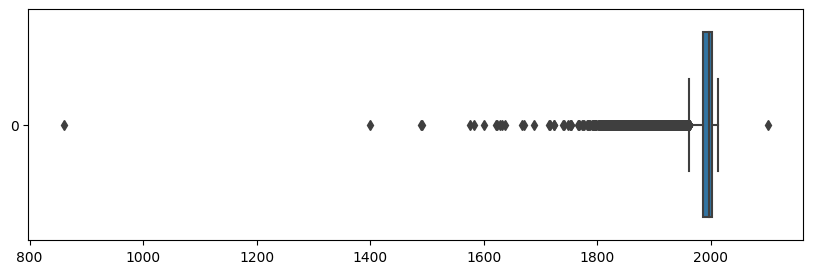

In [ ]:
# Display descriptive statistics of the 'year' column in the meteorite_data DataFrame
print(meteorite_data['year'].describe())
plt.figure(figsize=(10,3))

# Create a horizontal boxplot using seaborn to visualize the distribution of meteorite fall years
# 'year' is the column from the meteorite_data DataFrame
# orient='h' specifies a horizontal orientation for the boxplot
sns.boxplot(meteorite_data['year'],orient='h')

# Show the plot
plt.show()

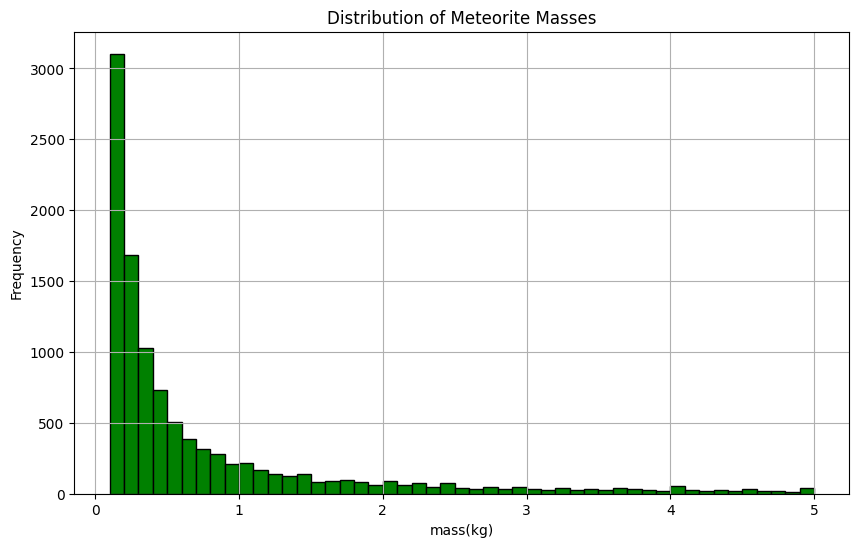

In [ ]:
# Set up a new figure with a size of 10 inches in width and 6 inches in height
plt.figure(figsize=(10, 6))

# Extract the "mass (g)" data from the meteorite_data DataFrame and convert it to kilograms for better visualization
df = meteorite_data["mass (g)"]
df = df / 1000

# Define custom bin edges for the histogram, creating an array of 50 evenly spaced values between 0.1 and 5.0
custom_x_axis_values = np.linspace(0.1, 5.0, 50)

# Create a histogram using the transformed mass data, with custom bins, green bars, and black edges
plt.hist(df, bins=custom_x_axis_values, color="green", edgecolor="black")

# Set the title, x-axis label, and y-axis label for the plot
plt.title('Distribution of Meteorite Masses')
plt.xlabel('Mass (kg)')
plt.ylabel('Frequency')

# Add a grid to the plot for better readability
plt.grid(True)

# Display the plot
plt.show()


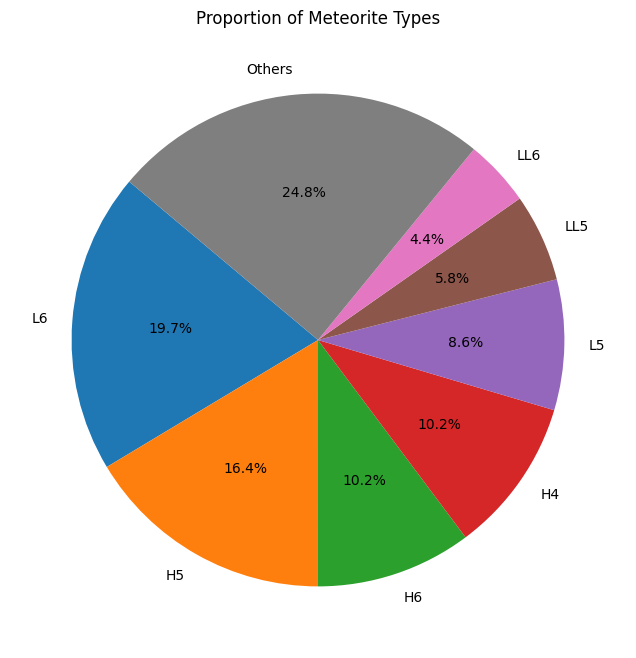

In [ ]:
# Extract meteorite types and calculate their proportions
meteorite_types = meteorite_data['recclass'].value_counts()
total_meteorites = len(meteorite_data)
proportions = meteorite_types / total_meteorites
# Sort the Series by percentage in descending order
proportions_sorted = proportions.sort_values(ascending=False)

# Extract the top 7 rows and sum the remaining rows as "others"
top_seven = proportions_sorted.head(7)
others = pd.Series(proportions_sorted.iloc[7:].sum(), index=['Others'])

# Concatenate the top 7 and "others" into a new Series
final_proportions = pd.concat([top_seven, others])

plt.figure(figsize=(10, 8))

# Create a pie chart using matplotlib to visualize the proportion of meteorite types
# final_proportions is assumed to be a pandas Series containing the proportions of each meteorite type
# labels are set as the index of final_proportions, autopct displays the percentage, startangle sets the initial angle of the pie chart
plt.pie(final_proportions, labels=final_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Meteorite Types')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:122: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


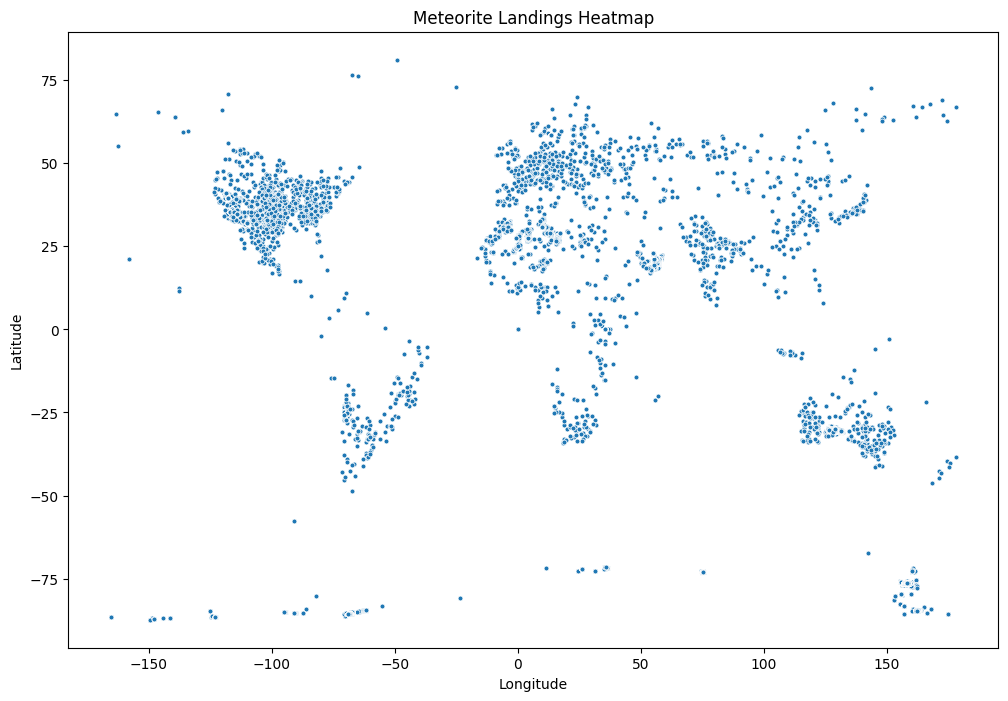

In [ ]:
# Create a heatmap
plt.figure(figsize=(12, 8))

# Create a scatter plot using seaborn to visualize the geographical distribution of meteorite landings
# 'reclong' represents the longitude, 'reclat' represents the latitude
# The 'alpha' parameter controls the transparency of the data points, 'marker' sets the marker style, 's' sets the marker size
# 'cmap' sets the color map for the scatter plot
sns.scatterplot(x='reclong', y='reclat', data=meteorite_data, alpha=1.0, marker='.', s=50, cmap='viridis')

# Set the title, xlabel, and ylabel for the plot
plt.title('Meteorite Landings Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


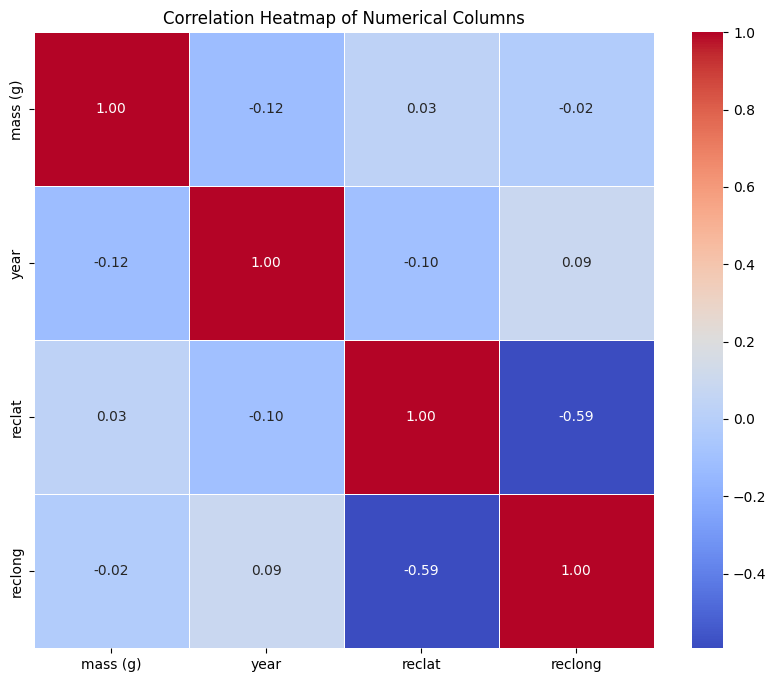

In [ ]:
# Select the numerical columns for correlation analysis
numerical_columns = ['mass (g)', 'year', 'reclat', 'reclong']

# Calculate the correlation matrix
correlation_matrix = meteorite_data[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn to visualize the correlation matrix
# annot=True adds numerical annotations to each cell, cmap='coolwarm' sets the color map,
# fmt=".2f" formats the annotations to display two decimal places, and linewidths=0.5 adjusts the gap between cells
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')

# Show the plot
plt.show()


In [ ]:
# Filter the meteorite_data DataFrame to select only the rows where meteorites were found (fall=="Found") and the name type is valid (nametype=="Valid")
found_valid_meteorites=meteorite_data[(meteorite_data['fall']=="Found")&(meteorite_data['nametype']=="Valid")]

In [ ]:
# Exploring the found_valid_meteorites dataframe
found_valid_meteorites

name     id nametype              recclass  mass (g)   fall  \
1065             Abajo      4    Valid                    H5    331.00  Found   
1066   Abar al' Uj 001  51399    Valid                  H3.8    194.34  Found   
1067            Abbott      5    Valid                  H3-6  21100.00  Found   
1068         Abernathy      7    Valid                    L6   2914.00  Found   
1069               Abo      8    Valid                     H      1.20  Found   
...                ...    ...      ...                   ...       ...    ...   
38110       Zillah 002  31356    Valid               Eucrite    172.00  Found   
38111           Zinder  30409    Valid  Pallasite, ungrouped     46.00  Found   
38112             Zlin  30410    Valid                    H4      3.30  Found   
38113        Zubkovsky  31357    Valid                    L6   2167.00  Found   
38114       Zulu Queen  30414    Valid                  L3.7    200.00  Found   

         year    reclat    reclong             GeoLocation  
1065   1982.0  26.80000 -105.41667      (26.8, -105.41667)  
1066   2008.0  22.72192   48.95937    (22.72192, 48.95937)  
1067   1951.0  36.30000 -104.28333      (36.3, -104.28333)  
1068   1941.0  33.85000 -101.80000         (33.85, -101.8)  
1069   1840.0  60.43333   22.30000        (60.43333, 22.3)  
...       ...       ...        ...                     ...  
38110  1990.0  29.03700   17.01850       (29.037, 17.0185)  
38111  1999.0  13.78333    8.96667     (13.78333, 8.96667)  
38112  1939.0  49.25000   17.66667       (49.25, 17.66667)  
38113  2003.0  49.78917   41.50460     (49.78917, 41.5046)  
38114  1976.0  33.98333 -115.68333  (33.98333, -115.68333)  

[37029 rows x 10 columns]

In [ ]:
# Create a Folium Map centered at [0, 0] with specified width, height, tileset, and zoom level
foundValidMeteoritesMap=folium.Map(location=[0,0],width='75%',height='60%',tiles='cartodb positron',zoom_start=1)

# Iterate through the indices of found_valid_meteorites DataFrame for the years 2006 to 2007
for i in found_valid_meteorites[(found_valid_meteorites['year']>2005)&(found_valid_meteorites['year']<=2007)].index:
    # Add a marker for each meteorite location with a popup displaying the meteorite name and use a red icon for the markers
    folium.Marker(location=[found_valid_meteorites.loc[i,'reclat'],found_valid_meteorites.loc[i,'reclong']],popup=found_valid_meteorites.loc[i,'name'],icon=folium.Icon(color='red')).add_to(foundValidMeteoritesMap)

In [ ]:
# Display the generated map
foundValidMeteoritesMap

1979


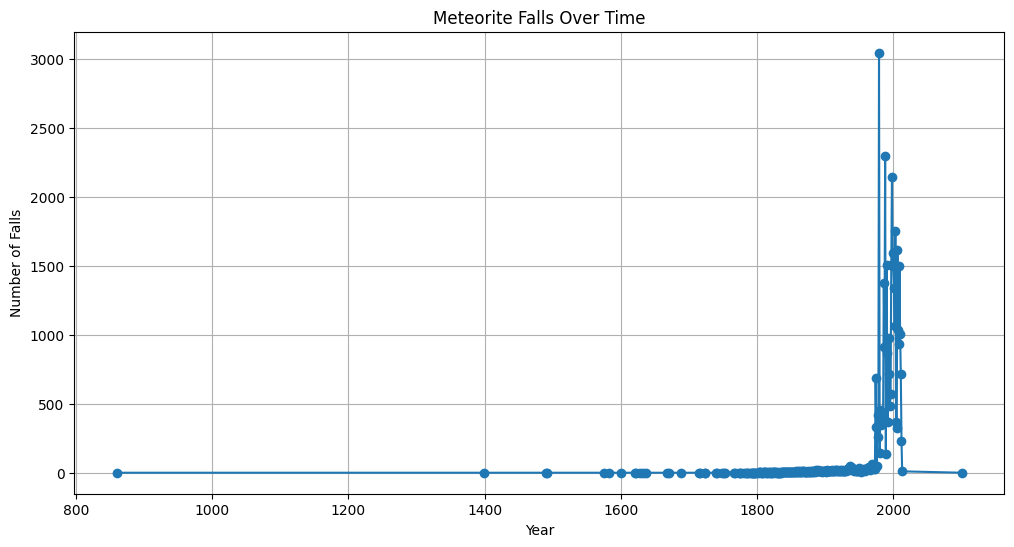

In [ ]:
# Extract the 'year' column from the meteorite_data DataFrame
year_df=meteorite_data['year']

# Count the number of occurrences for each unique year and sort the results by year
fall_counts_by_year = year_df.value_counts().sort_index()
year_with_highest_falls = fall_counts_by_year.idxmax()
print(year_with_highest_falls)
# Plot the time series analysis
plt.figure(figsize=(12, 6))

# Plot the data points using markers ('o') and connect them with lines ('-')
plt.plot(fall_counts_by_year.index, fall_counts_by_year.values, marker='o', linestyle='-')

# Set the title, xlabel, and ylabel for the plot
plt.title('Meteorite Falls Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Falls')

#Add grid to the plot
plt.grid(True)
plt.show()


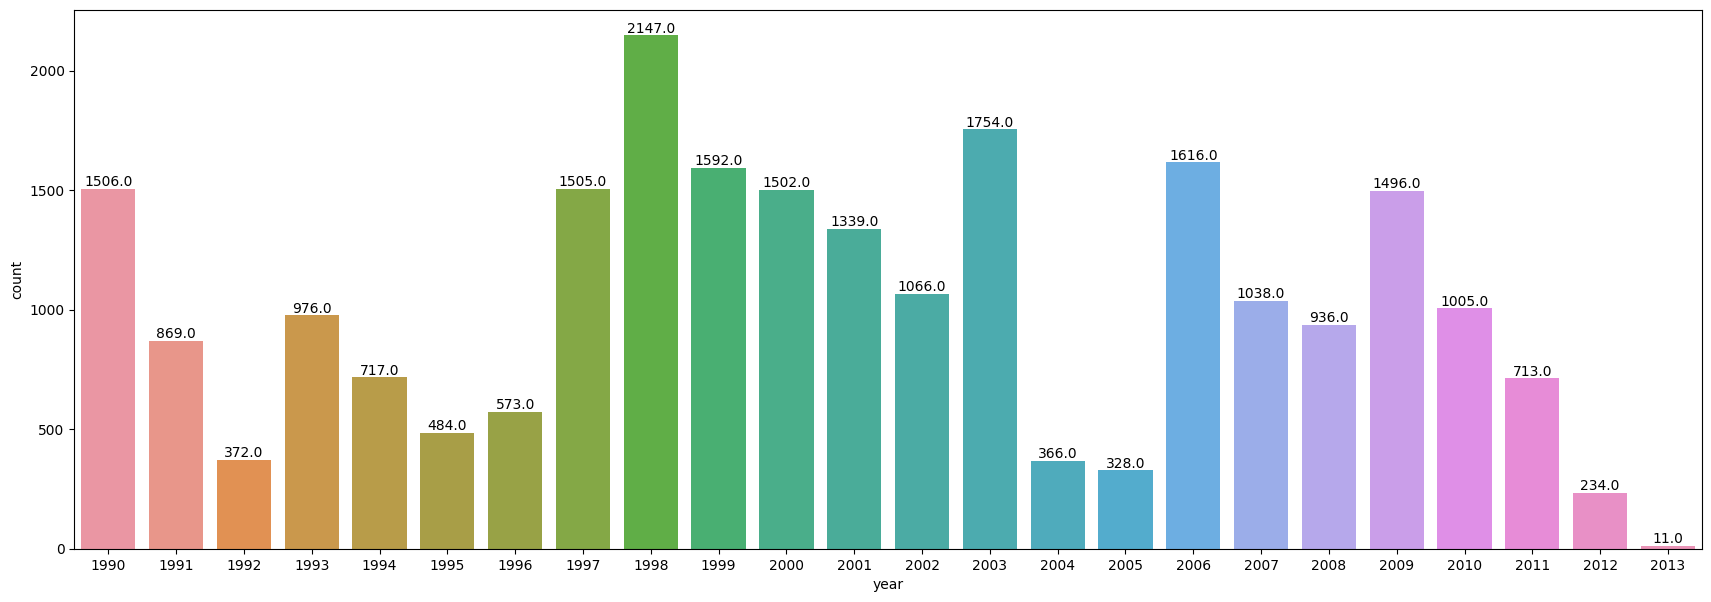

In [ ]:
plt.figure(figsize=(21,7))
df=meteorite_data

# Convert the 'year' column to integer type for better plotting
df['year'] = df['year'].astype(int)

# Create a countplot using seaborn for the 'year' column
# Show only the data for the years between 1990 and 2020
cp=sns.countplot(x='year',data=df[(df['year']>=1990)&(df['year']<2020)])

# Annotate each bar in the countplot with its corresponding height
for p in cp.patches:
  cp.annotate(str((p.get_height())),xy=((p.get_x()+p.get_width()/2,p.get_height())),ha='center',va='bottom')


<ipython-input-19-6d6e7b4c4d92>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dp=sns.distplot(df.loc[(df['year']>=1970)&(df['year']<2000),'year'],bins=6,kde=False)


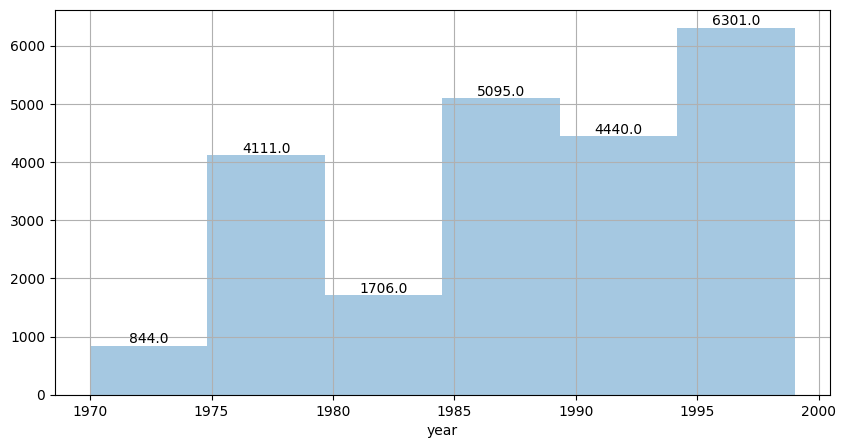

In [ ]:
plt.figure(figsize=(10,5))
df=meteorite_data
# Convert the 'year' column to integer type for better plotting
df['year'] = df['year'].astype(int)

# Create a histogram using seaborn's distplot
# Set the number of bins to 6 and disable kernel density estimation (kde)
# The resulting plot is stored in the variable 'dp'
dp=sns.distplot(df.loc[(df['year']>=1970)&(df['year']<2000),'year'],bins=6,kde=False)

# Annotate each bar in the histogram with its corresponding height
for p in dp.patches:
  dp.annotate(str((p.get_height())),xy=((p.get_x()+p.get_width()/2,p.get_height())),ha='center',va='bottom')

# Add a grid to the plot
plt.grid()

#Show the plot
plt.show()

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found
